<a href="https://colab.research.google.com/github/gibsonw/PUCRS-KDD/blob/master/Copy_of_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Especialização em Ciência de Dados – Escola Politécnica**

**Aprendizado Não Supervisionado**

Prof. Prof. Thomas da Silva Paula

Trabalho I - Implementação K-means

##GIBSON WEINERT


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets.samples_generator import make_blobs


In [0]:
#@title

def plot_graf(ds,ds_centroid,qtd_classificacao,mark_color=None):

    ds['group'] = 'k_'+ds.k.astype(str)
    groups = ds.groupby('group')

    if mark_color is None:
        mark_color = 'Y'

    desc_title = str(qtd_classificacao)

    fig, ax = plt.subplots(figsize=(10,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    for name, group in groups:
        ax.scatter(group.x, group.y, marker='o', label=name,alpha=0.6)
        ax.legend()
    ax.scatter(ds_centroid['x'], ds_centroid['y'], marker='X', s=250, label='Centroid',color=mark_color)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(desc_title)
    plt.legend(loc='best')
    plt.xticks(())
    plt.yticks(())
    plt.show()


def aloc_kmeans_clustering(ds_unclass,centroid):
    ds_dist = pd.DataFrame()
    k = len(centroid)
    ds = ds_unclass[['x','y']]

    for i in range(len(centroid)):
        # calcula distancia euclidiana 
        ds_dist[str(i)] = (((ds - centroid.iloc[i].ravel())**2).sum(axis=1))**(1/2)

    ds_dist['k'] = ds_dist.iloc[:,0:k].idxmin(axis=1,skipna=True).astype(int)
    ds_dist_calc = pd.concat((ds,ds_dist['k']),axis=1)
    return(ds_dist_calc,centroid)


#calcula novo centroid
def re_aloc_centroid(cluster,n_centroid,k):
    novo_centroid = n_centroid
    if len(novo_centroid) < len(cluster):
        for idx in range(k):
            if idx not in cluster.index:
                novo_centroid.loc[idx] = make_blobs(n_samples=1, n_features=2)[0].tolist()[0]
                novo_centroid.sort_index(inplace=True)
    if len(cluster) < len(novo_centroid):
        for idx in novo_centroid.index:
            if idx not in cluster.index:
                novo_centroid.loc[idx] = make_blobs(n_samples=1, n_features=2)[0].tolist()[0]
                novo_centroid.sort_index(inplace=True)
    return(novo_centroid)

def create_centroid(k,rnd=None):
    if rnd is None:
        centroid = pd.DataFrame(make_blobs(n_samples=k, n_features=2)[0], columns = ['x','y'])
    else:
        centroid = pd.DataFrame(make_blobs(n_samples=k, random_state = rnd, n_features=2)[0], columns = ['x','y'])
    return(centroid)

def do_kmeans_clustering(k,x,rnd=None):
    # controla a distncia entre o centro do grupo k e a posição do centroid serve para stop do do_kmeans_clustering
    conv=1e-3

    if rnd is None:
        ds = pd.DataFrame(make_blobs(n_samples=x, n_features=2)[0], columns = ['x','y'])
        centroid = create_centroid(k)
    else:
        ds = pd.DataFrame(make_blobs(n_samples=x, random_state = rnd, n_features=2)[0], columns = ['x','y'])
        centroid = create_centroid(k,rnd)

    if (ds.empty):
        return(print('Dataset inválido'))

    ds_dist_calc,centroid = aloc_kmeans_clustering(ds,centroid)

    stop_div = 2 * conv
    loopwhile = 0
    novo_centroid = centroid

    loopwhile = len(ds_dist_calc.groupby('k').mean())

    plot_graf(ds_dist_calc,centroid,'Primeira classificação Aleatória dos centróides')

    while loopwhile < k:
        novo_centroid = re_aloc_centroid(pd.DataFrame(ds_dist_calc.groupby('k')['k'].mean()),centroid,k)        
        ds_dist_calc,centroid = aloc_kmeans_clustering(ds_dist_calc,novo_centroid)
        loopwhile = len(ds_dist_calc.groupby('k'))
        plot_graf(ds_dist_calc,centroid,'Correção centroides que não tiveram agrupamentos','R')

    loopwhile = 0 

    while stop_div > conv:
        loopwhile += 1
        ds_dist_calc,centroid = aloc_kmeans_clustering(ds_dist_calc,centroid)

        if (loopwhile == 1) or (loopwhile % 5) == 0:
            plot_graf(ds_dist_calc,centroid,'Recalculo do agrupamento etapa -->>'+str(loopwhile))

        media_centroid = ds_dist_calc.groupby('k').mean()

        stop_div = 0.0
        for i in range(len(novo_centroid)):
            stop_div += (((centroid.iloc[i].ravel() - media_centroid.iloc[i].ravel())**2).sum())**(1/2)

        centroid = media_centroid
        stop_div /= k

    plot_graf(ds_dist_calc,centroid,'Recalculo do agrupamento etapa -->>'+str(loopwhile))
    return(ds_dist_calc,centroid)


In [0]:
k = 3
x = 300
random_state = 100

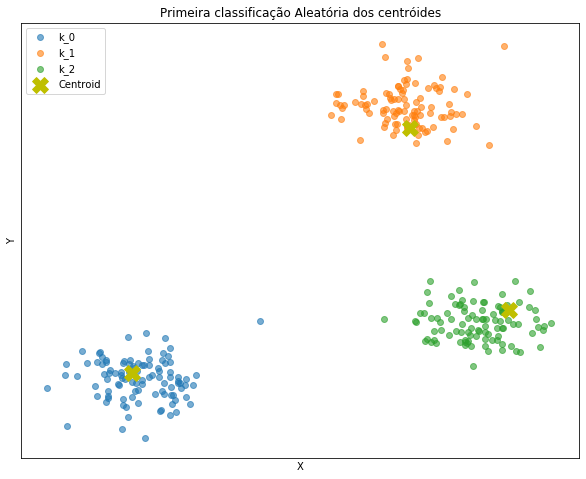

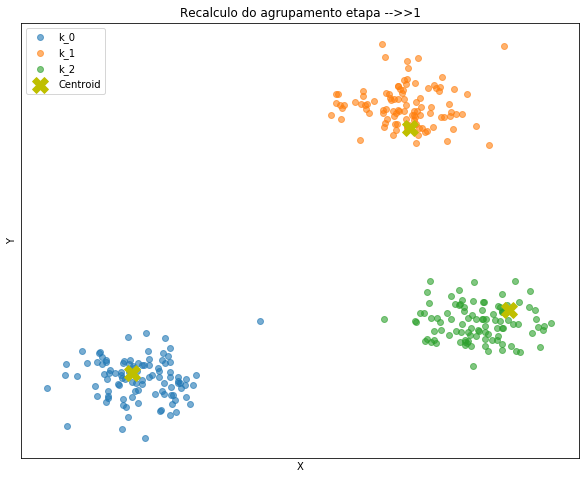

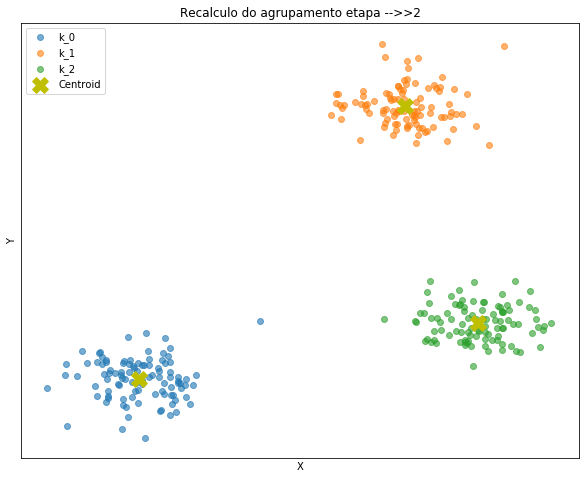

In [0]:
#random_state = None
ds_final, centroid_final = do_kmeans_clustering(k,x,random_state)


In [0]:
#@title
#random_state = None
#ds_final, centroid_final = do_kmeans_clustering(6,3000,random_state)


In [0]:
print('centróides finais: \n')
centroid_final

centróides finais: 



,x,y
k,,
0,7.633382,-0.890631
1,3.336562,-9.800084
2,8.182804,2.553470


In [0]:
print('Grupos finais:\n')
ds_final.head()

Grupos finais:



,x,y,k,group
0,4.969719,-9.849080,1,k_1
1,8.523857,0.341187,0,k_0
2,1.805984,-10.162033,1,k_1
3,7.554727,0.046105,0,k_0
4,4.618162,-9.513727,1,k_1
